In [1]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from bs4 import BeautifulSoup
from sklearn.linear_model import Ridge
from sklearn import datasets, linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
r = requests.get("https://github.com/jennybc/gapminder/blob/main/data-raw/08_gap-every-five-years.tsv")

In [3]:
df = pd.DataFrame(columns=['country', 'continent','year','lifeExp','pop','gdbPercap'])
soup = BeautifulSoup(r.text, 'html.parser')
lst = soup.findAll('tr')
lst2 = []
for items in lst:
    p = (items.find_all('td'))
    lst2 = []
    for x in p:
        lst2.append(x.get_text())
    if len(lst2) == 7:
        df.loc[len(df)] = lst2[1:len(lst2)]
display(df)

,country,continent,year,lifeExp,pop,gdbPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.4453145
1,Afghanistan,Asia,1957,30.332,9240934,820.8530296
2,Afghanistan,Asia,1962,31.997,10267083,853.10071
3,Afghanistan,Asia,1967,34.02,11537966,836.1971382
4,Afghanistan,Asia,1972,36.088,13079460,739.9811058
5,Afghanistan,Asia,1977,38.438,14880372,786.11336
6,Afghanistan,Asia,1982,39.854,12881816,978.0114388
7,Afghanistan,Asia,1987,40.822,13867957,852.3959448
8,Afghanistan,Asia,1992,41.674,16317921,649.3413952
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [4]:
df2 = df.sort_values(by=['year'])
display(df2)

,country,continent,year,lifeExp,pop,gdbPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.4453145
528,France,Europe,1952,67.41,42459667,7029.809327
540,Gabon,Africa,1952,37.003,420702,4293.476475
1656,West Bank and Gaza,Asia,1952,43.16,1030585,1515.592329
552,Gambia,Africa,1952,30,284320,485.2306591
564,Germany,Europe,1952,67.5,69145952,7144.114393
576,Ghana,Africa,1952,43.149,5581001,911.2989371
588,Greece,Europe,1952,65.86,7733250,3530.690067
600,Guatemala,Americas,1952,42.023,3146381,2428.237769
612,Guinea,Africa,1952,33.609,2664249,510.1964923


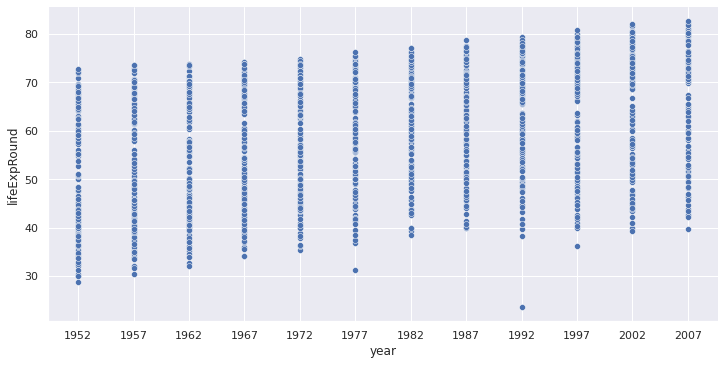

In [5]:
# Exercise 1
lst = []
for items in df2['lifeExp']:
    lst.append(round(float(items),2))
df2['lifeExpRound'] = lst
sns.set_theme()
sns.relplot(
    data=df2,
    x="year", y="lifeExpRound", aspect=2
)

In [6]:
# Question 1
# The general trend is that life expectancy is increasing overtime.
# The lowest in a given year is always higher the next year (next year meaning 5 years later)
# There are exceptions in the years 1977, 1992 and 1997
# Every year the max life expectancy is higher than the past year
# Based on the way the points on the graph are slowly increasing for each time period 
# it appears to be linear growth

Text(0.5, 1.0, 'Violin Plot Example (Show Medians)')

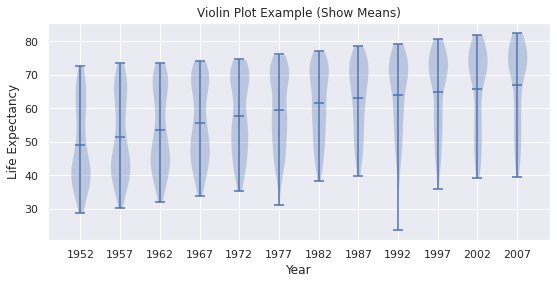

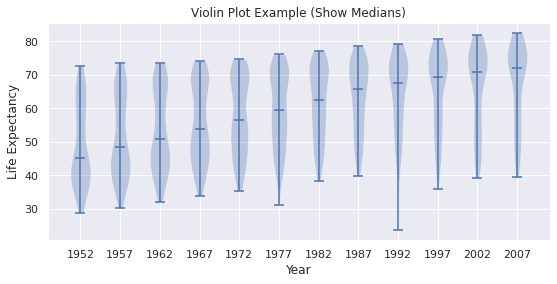

In [7]:
# The way I did it was to create an array for each year, storing the Life Expectancy values for that year, 
# then collected those arrays into a list: life_exp_per_year
year_lst = []
for items in df2['year']:
    if items not in year_lst:
        year_lst.append(items)
life_exp_per_year = []
tot_yr_lst = df2['year'].tolist()
life_exp = df2['lifeExp'].tolist()
lst = []
for items in year_lst:
    count = 0
    lst = []
    for ele in tot_yr_lst:
        if items == ele:
            lst.append(float(life_exp[count]))
        count += 1
    life_exp_per_year.append(lst)

fig, ax = plt.subplots(figsize=(9, 4))
ax.violinplot(life_exp_per_year, showmeans=True, showmedians=False)
labels = year_lst
ax.set_xticks(np.arange(1, len(labels) + 1))
ax.set_xticklabels(labels)

ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy")
ax.set_title("Violin Plot Example (Show Means)")

fig, ax = plt.subplots(figsize=(9, 4))
ax.violinplot(life_exp_per_year, showmeans=False, showmedians=True)
labels = year_lst
ax.set_xticks(np.arange(1, len(labels) + 1))
ax.set_xticklabels(labels)

ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy")
ax.set_title("Violin Plot Example (Show Medians)")

In [8]:
# Question 2
# Before 1977, the data is skewed right, the means are larger than the medians
# After 1977 the data is skewed left, the means are less than the medians
# The data does not appear unimodel, it shows linear growth with no identifiable "humps" in the data 
# In 1977 , the data is symmetric the median is equivalent to the mean

In [9]:
# Question 3
# (Assumption)
# I will reject the NULL hypothesis there has to be some type of relationship between time and Life Expectancy
# Something out of the ordinary or a mistake would result in a NULL hypothesis

In [10]:
# Question 4
# (Assumption)
# The residuals consist of points that lie above and below the line 
# The cluster (the blue shadow where most of the point lie) will shift away from the mean
# The area around the mean will be the slimest part of the plot. Assuming

In [11]:
# Question 5
# (Assumption)
# OH: I think i should do this question after E2
# The violin plot should look similar to the original
# I assume based on the purpose of a linear regression model which is to model the relationship between two variables
# The violin plot based on our line regression model would have to correlate with the data in some way 

In [12]:
# Exercise 2
lst = []
for items in df2['lifeExp']:
    lst.append(float(items))
df2['lifeExpRound'] = lst
lst = []
for items in df2['year']:
    lst.append(int(items))
df2['yearRound'] = lst
df2.fillna(method ='ffill', inplace = True)

X = np.array(df2['yearRound']).reshape(-1, 1)
y = np.array(df2['lifeExpRound']).reshape(-1, 1)
  
df2.dropna(inplace = True)
  
regr = LinearRegression()
  
regr.fit(X, y)
print(regr.score(X, y))
regr.coef_

0.18975713852188814


array([[0.32590383]])

In [13]:
results = smf.ols('lifeExpRound ~ yearRound', data=df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           lifeExpRound   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           7.55e-80
Time:                        00:41:56   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

In [14]:
# Question 6
dict = {}
for items in df2['year']:
    if items not in dict:
        dict[items] = []
l = df2['lifeExp'].tolist()
for ele in dict: 
    count = 0
    for items in df2['year']:
        if ele == items:
            dict[ele].append(float(l[count]))
        count += 1
avg = 0
for key in dict:
    dict[key] = np.mean(dict[key])
print("On average life expectancy increases: ")
print((67.00742253521126 - 49.057619718309866)/55)
print("per year")
# 55 years 

On average life expectancy increases: 
0.326360051216389
per year


In [15]:
# Question 7 
# Yes! There is always a statistically significant relationship between year and life expectancy. 

In [16]:
# Exercise 3
X = np.array(df2['yearRound']).reshape(-1, 1)
y = np.array(df2['lifeExpRound']).reshape(-1, 1)

df2.dropna(inplace = True)

regr = LinearRegression()

regr.fit(X, y)
y_pred = regr.predict(X)
pred = []
year = []
og_val = []
temp = []
final = []
count = 0
for items in y_pred:
    pred.append(items[0])
for items in X:
    year.append(items[0])
for items in y:
    og_val.append(items[0])
count = 0
for yr in year_lst:
    temp = []
    count = 0
    for ele in year:
        if str(ele) == str(yr):
            temp.append(og_val[count] - pred[count])    
        count += 1
    final.append(temp)


Text(0.5, 1.0, 'Violin Plot Example (Residuals)')

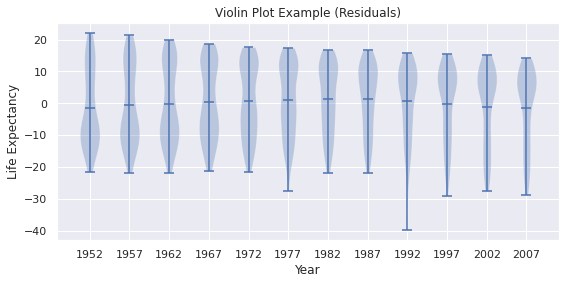

In [17]:
fig, ax = plt.subplots(figsize=(9, 4))
ax.violinplot(final, showmeans=True, showmedians=False)
labels = year_lst
ax.set_xticks(np.arange(1, len(labels) + 1))
ax.set_xticklabels(labels)

ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy")
ax.set_title("Violin Plot Example (Residuals)")


In [18]:
# Question 8
# The violin plot looks very similar to the original 
# Not what i expected as I was going through the project i learned a lot more about residuals
# i realized what i'm plotting is the difference between the prediction and the actual value
# Therefore the means are often around zero. The means are below 0 if the prediction is too high and vice versa
# When the mean is below zero the plot is thicker at the bottom and vice versa
# if y_vals - y_pred < 0 then the pred is greater than the original values so the plot shows when the prediction is too high,
# too low, or perfect 0 mean.


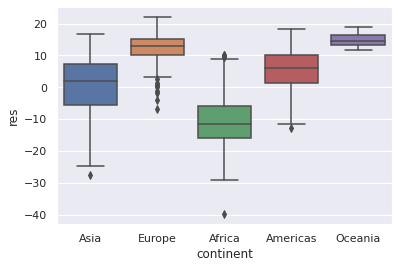

In [19]:
# Exercise 4
df2['res'] = (y-regr.predict(X))
ax = sns.boxplot(y='res', x='continent',data = df2)


In [20]:
# Question 9 
# I'm interpretting this question as is there any dependece between a continent and the overall residual graph
# Do some continents graph resemble the overall graph
# I do not notice a strong dependence between a continent and the residuals
# If i did notice a dependence, i could infer that world life expectancy depends on the life expectancy on a certain nation

In [21]:
# Exercise 5
def func2(continent):
    con_year = []
    con_le = []
    yr = []
    le = []
    yr = df2['yearRound'].tolist()
    le = df2['lifeExpRound'].tolist()
    count = 0
    for items in df2['continent']:
        if items == continent:
            con_year.append(yr[count])
            con_le.append(le[count])
        count += 1
    new_df = pd.DataFrame()
    new_df['year'] = con_year
    new_df['lifeExp'] = con_le
    
    X = np.array(new_df['year']).reshape(-1, 1)
    y = np.array(new_df['lifeExp']).reshape(-1, 1)

    regr = LinearRegression()

    regr.fit(X, y)
    y_pred = regr.predict(X)
    plt.scatter(X, y, color ='b')
    plt.plot(X, y_pred, color ='k')

    plt.show()

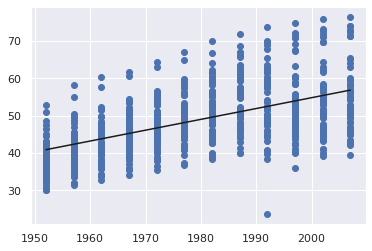

In [22]:
func2('Africa')

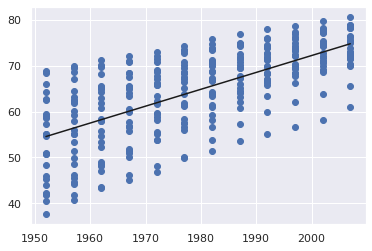

In [23]:
func2('Americas')

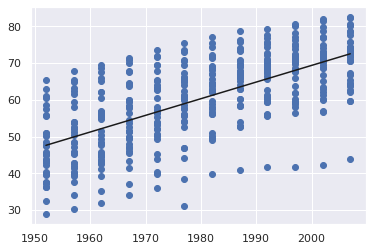

In [24]:
func2('Asia')

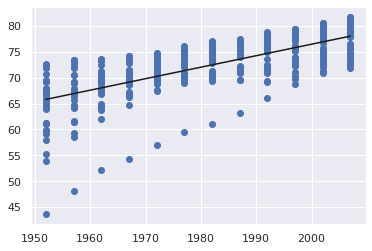

In [25]:
func2('Europe')

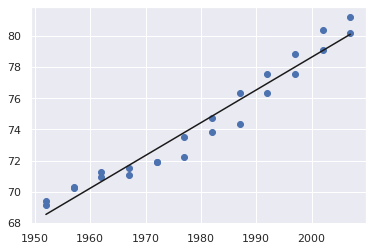

In [26]:
func2('Oceania')

In [27]:
# Question 10
# Yes because that way we can see the effect each continent has on the overall world life expectancy

In [28]:
# Exercise 6
results = smf.ols('lifeExpRound ~ yearRound * continent', data=df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           lifeExpRound   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:42:00   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [29]:
# Question 11
# All parameters in the model are different from zero in the p-value sense except for Africa 

In [30]:
# Question 12
print("Africa")
print(results.params.values[5])
print("Americas")
print(results.params.values[6] + results.params.values[5])
print("Asia")
print(results.params.values[7] + results.params.values[5])
print("Europe")
print(results.params.values[8] + results.params.values[5])
print("Oceania")
print(results.params.values[9] + results.params.values[5])

Africa
0.2895292630465812
Americas
0.36765093706503704
Asia
0.453122403901149
Europe
0.2219321445242145
Oceania
0.21027237762444673


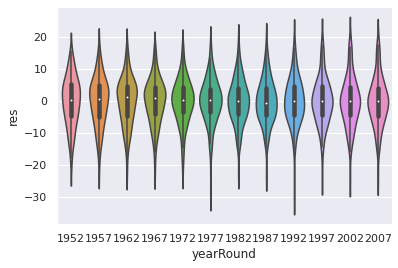

In [32]:
# Exercise 7
d=df2[['year','continent']]
d=pd.get_dummies(data=d, drop_first=True)
df2['res']=(df2['lifeExpRound']-regr.fit(d, df2['lifeExpRound']).predict(d))
ax=sns.violinplot(x="yearRound", y="res",data=df2, aspect=4)

In [45]:
# Part 2
#Model #1 LDA
diabetes = datasets.load_diabetes()
X = np.array(diabetes.data)
y = np.array(diabetes.target)
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
# LinearDiscriminantAnalysis()
print(clf.score(X,y))
print(clf.predict(X))


0.3665158371040724
[151.  65. 110.  68.  64.  99.  71.  80. 131. 272. 101. 201.  90. 202.
  65. 171. 166. 235. 200.  97.  93.  71. 113. 245. 184. 142. 101.  85.
 198. 283. 200.  72. 341.  87.  65. 102. 265. 276. 217. 131. 100.  42.
 142.  39. 259.  91.  97. 101.  63. 150. 127. 178. 200. 113. 113.  72.
 275.  37.  87.  53. 200. 126.  39. 115.  88. 292. 150.  53.  88. 127.
  72. 270. 197.  91.  85.  53. 263.  55. 252. 113. 191.  88.  63. 142.
  65. 141.  55. 109.  42.  48.  98. 180. 191.  96.  52. 162. 232. 279.
 202. 214. 128. 170. 302. 141.  52.  88. 200. 144. 232.  81.  47.  90.
 200. 297. 310. 229. 259. 189.  94. 185. 200. 198. 180.  84. 200. 161.
  55.  51. 134. 268. 274.  96.  53.  71. 128. 275.  72. 280. 336. 281.
 178. 317. 202.  52. 174. 293. 142. 279. 200. 126. 288.  90. 292. 138.
 131. 186. 200.  53. 115. 195.  97. 217. 140. 263.  87.  72.  71. 173.
 268. 273.  47.  55. 295. 101. 151. 127. 178. 225.  65. 190. 252.  72.
  91. 178. 198. 101. 233.  52. 219. 214. 292. 178.  63. 13

In [41]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

#MY attempt at 10 fold validation 
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
# evaluate model
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.002 (0.007)


In [34]:
# Model #2 Decision tree
from sklearn import tree
X = diabetes.data
Y = diabetes.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
print(clf.score(X,y))
print(clf.predict(X))


1.0
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  

In [43]:
# My attempt at 10 fold validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
# evaluate model
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.005 (0.009)


In [44]:
# To describe the dataset I am using, it is the diabetes dataset. 
# I am using the diabetes.data to predict the diabetes.targets
# The model's i am using are LDA and Decision trees

In [ ]:
# The decision tree prediction was way more accurate than the Linear discernment analysis and even the 
# linear regression performed in part 1. The performance metric used was the accuracy score